In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
credit_risk = pd.read_csv(r"C:\Users\deepa\Panda 2024\Credit Risk Project\Dataset\credit_risk_dataset.csv")
credit_risk

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [25]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## 1) Eleminating the Extreme Outliers

In [26]:
credit_risk.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [27]:
credit_risk.isna().sum()/len(credit_risk)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Observation:-
1. Person_emp_lenth has 2.74% of missing value
2. loan_int_rate has 9.56% of missing value

In [28]:
credit_risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

#### Observation:-
1. Person age should be in between 18 to 80. it can not be 144
2. Person employement length should be in between 0 to 50.

***Solution:-***
1. We will remove the entry of age greater than 80 and employment length greater than 50 years

In [29]:
credit_risk = credit_risk[(credit_risk['person_age']>=18) & (credit_risk['person_age']<=80)]

In [30]:
credit_risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32574.000000   3.257400e+04       31679.000000  32574.000000   
mean      27.714281   6.588254e+04           4.789735   9589.199975   
std        6.186447   5.253584e+04           4.142752   6322.057346   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max       80.000000   2.039784e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29460.000000  32574.000000         32574.000000   
mean       11.011666      0.218211             0.170211   
std         3.240614      0.413038             0.106779   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32574.000000  
mean                     5.802757  
std                      4.050959  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [31]:
credit_risk = credit_risk[(credit_risk['person_emp_length']>=0) & (credit_risk['person_emp_length']<=50)]

In [32]:
credit_risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  31677.000000   3.167700e+04       31677.000000  31677.000000   
mean      27.726805   6.649055e+04           4.782271   9660.051457   
std        6.194392   5.276968e+04           4.034989   6334.535354   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.939600e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       80.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28631.000000  31677.000000         31677.000000   
mean       11.039825      0.215456             0.169609   
std         3.229398      0.411145             0.106270   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                31677.000000  
mean                     5.807968  
std                      4.056804  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [33]:
credit_risk.head()

person_age  person_income person_home_ownership  person_emp_length  \
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   
5          21           9900                   OWN                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   
5     VENTURE          A       2500           7.14            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4  
5                 0.25                         N                           2

## 2) Checking for Duplicates

In [36]:
credit_risk.duplicated().sum()

157

In [37]:
credit_risk

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
5              VENTURE          A       2500           7.14            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
5                     0.25                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
1                               2  
2                               3  
3                               2  
4                               4  
5                               2  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[31677 rows x 12 columns]

In [56]:
dup_check = credit_risk[credit_risk.duplicated()]

In [57]:
dup_check

person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT                5.0   
15989          23          90000              MORTGAGE                7.0   
15995          24          48000              MORTGAGE                4.0   
16025          24          10000                  RENT                8.0   
16028          23         100000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   
32279          43          11340                  RENT                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975            VENTURE          B       6000           9.99            0   
15989          EDUCATION          B       8000          10.36            0   
15995            MEDICAL          A       4000           5.42            0   
16025           PERSONAL          A       3000           7.90            1   
16028          EDUCATION          A      15000           7.88            0   
...                  ...        ...        ...            ...          ...   
32010    HOMEIMPROVEMENT          A       2500           5.42            0   
32047  DEBTCONSOLIDATION          A      20000           7.88            0   
32172            MEDICAL          B      12000          10.99            0   
32259            VENTURE          B       1000          10.37            0   
32279          EDUCATION          C       1950            NaN            1   

       loan_percent_income cb_person_default_on_file  \
15975                 0.14                         N   
15989                 0.09                         N   
15995                 0.08                         N   
16025                 0.30                         N   
16028                 0.15                         N   
...                    ...                       ...   
32010                 0.06                         N   
32047                 0.08                         N   
32172                 0.10                         N   
32259                 0.03                         N   
32279                 0.17                         N   

       cb_person_cred_hist_length  
15975                           4  
15989                           3  
15995                           4  
16025                           3  
16028                           4  
...                           ...  
32010                          12  
32047                          17  
32172                          12  
32259                          16  
32279                          11  

[157 rows x 12 columns]

In [62]:
credit_risk = credit_risk.drop_duplicates()

In [63]:
credit_risk.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  31520.000000   3.152000e+04       31520.000000  31520.000000   
mean      27.738642   6.650213e+04           4.783058   9663.861041   
std        6.199607   5.275305e+04           4.037384   6334.963332   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.945000e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       80.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28494.000000  31520.000000         31520.000000   
mean       11.045344      0.215958             0.169657   
std         3.230775      0.411492             0.106297   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                31520.000000  
mean                     5.814848  
std                      4.060707  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

## Dataset Imbalanced

In [136]:
credit_risk

person_age  person_income person_home_ownership  person_emp_length  \
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
5              21           9900                   OWN                2.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
5              VENTURE          A       2500           7.14            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
5                     0.25                         N   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
1                               2  
2                               3  
3                               2  
4                               4  
5                               2  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[31520 rows x 12 columns]

In [137]:
credit_risk['loan_status'].value_counts()

0    24713
1     6807
Name: loan_status, dtype: int64

In [139]:
credit_risk['loan_status'].value_counts()/len(credit_risk)*100

0    78.404188
1    21.595812
Name: loan_status, dtype: float64

There is imbalancy in the dataset.Only 21% of the target values are positive class and rest of the 0th class

## 3) Dealing with Null Values

1. In this notebook, we are filling these NA values by iterativeimputer before the train test split. This is done only for finding the relation using graph
2. But actually iterativeimputer is use after the train test split. This is done so that there is no data leakage
3. Iterativeimputer is the best technique to deal numerical column

In [118]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [119]:
credit_risk.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [120]:
credit_risk.isna().sum()/len(credit_risk)*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.600254
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

1. loan_int_rate has missing value greater than 5% so we will directly drop these values rather than we will use Iterative imputer

In [121]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31520 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31520 non-null  int64  
 1   person_income               31520 non-null  int64  
 2   person_home_ownership       31520 non-null  object 
 3   person_emp_length           31520 non-null  float64
 4   loan_intent                 31520 non-null  object 
 5   loan_grade                  31520 non-null  object 
 6   loan_amnt                   31520 non-null  int64  
 7   loan_int_rate               28494 non-null  float64
 8   loan_status                 31520 non-null  int64  
 9   loan_percent_income         31520 non-null  float64
 10  cb_person_default_on_file   31520 non-null  object 
 11  cb_person_cred_hist_length  31520 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.1+ MB


In [122]:
cat_col = list(credit_risk.dtypes[credit_risk.dtypes==object].index)
cat_col

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [123]:
credit_risk.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3026
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [124]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31520 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31520 non-null  int64  
 1   person_income               31520 non-null  int64  
 2   person_home_ownership       31520 non-null  object 
 3   person_emp_length           31520 non-null  float64
 4   loan_intent                 31520 non-null  object 
 5   loan_grade                  31520 non-null  object 
 6   loan_amnt                   31520 non-null  int64  
 7   loan_int_rate               28494 non-null  float64
 8   loan_status                 31520 non-null  int64  
 9   loan_percent_income         31520 non-null  float64
 10  cb_person_default_on_file   31520 non-null  object 
 11  cb_person_cred_hist_length  31520 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 4.1+ MB


In [125]:
num_col = list(credit_risk.dtypes[credit_risk.dtypes!=object].index)
num_col

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [126]:
credit_risk[num_col]

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
5              21           9900                2.0       2500           7.14   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
1                0                 0.10                           2  
2                1                 0.57                           3  
3                1                 0.53                           2  
4                1                 0.55                           4  
5                1                 0.25                           2  
...            ...                  ...                         ...  
32576            0                 0.11                          30  
32577            0                 0.15                          19  
32578            1                 0.46                          28  
32579            0                 0.10                          26  
32580            0                 0.15                          30  

[31520 rows x 8 columns]

In [127]:
iterator = IterativeImputer(max_iter=20)

num_col_filled_na = iterator.fit_transform(credit_risk[num_col])
num_col_filled_na

array([[2.10e+01, 9.60e+03, 5.00e+00, ..., 0.00e+00, 1.00e-01, 2.00e+00],
       [2.50e+01, 9.60e+03, 1.00e+00, ..., 1.00e+00, 5.70e-01, 3.00e+00],
       [2.30e+01, 6.55e+04, 4.00e+00, ..., 1.00e+00, 5.30e-01, 2.00e+00],
       ...,
       [6.50e+01, 7.60e+04, 3.00e+00, ..., 1.00e+00, 4.60e-01, 2.80e+01],
       [5.60e+01, 1.50e+05, 5.00e+00, ..., 0.00e+00, 1.00e-01, 2.60e+01],
       [6.60e+01, 4.20e+04, 2.00e+00, ..., 0.00e+00, 1.50e-01, 3.00e+01]])

In [128]:
num_col_filled_na.shape

(31520, 8)

In [129]:
num_col_filled_na = pd.DataFrame(num_col_filled_na,columns=num_col)
num_col_filled_na

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            21.0         9600.0                5.0     1000.0          11.14   
1            25.0         9600.0                1.0     5500.0          12.87   
2            23.0        65500.0                4.0    35000.0          15.23   
3            24.0        54400.0                8.0    35000.0          14.27   
4            21.0         9900.0                2.0     2500.0           7.14   
...           ...            ...                ...        ...            ...   
31515        57.0        53000.0                1.0     5800.0          13.16   
31516        54.0       120000.0                4.0    17625.0           7.49   
31517        65.0        76000.0                3.0    35000.0          10.99   
31518        56.0       150000.0                5.0    15000.0          11.48   
31519        66.0        42000.0                2.0     6475.0           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
0              0.0                 0.10                         2.0  
1              1.0                 0.57                         3.0  
2              1.0                 0.53                         2.0  
3              1.0                 0.55                         4.0  
4              1.0                 0.25                         2.0  
...            ...                  ...                         ...  
31515          0.0                 0.11                        30.0  
31516          0.0                 0.15                        19.0  
31517          1.0                 0.46                        28.0  
31518          0.0                 0.10                        26.0  
31519          0.0                 0.15                        30.0  

[31520 rows x 8 columns]

In [130]:
num_col_filled_na.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [131]:
num_col_filled_na.isna().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [132]:
cat_col_filled_na = credit_risk[cat_col].reset_index(drop=True)
cat_col_filled_na

person_home_ownership      loan_intent loan_grade  \
0                       OWN        EDUCATION          B   
1                  MORTGAGE          MEDICAL          C   
2                      RENT          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                       OWN          VENTURE          A   
...                     ...              ...        ...   
31515              MORTGAGE         PERSONAL          C   
31516              MORTGAGE         PERSONAL          A   
31517                  RENT  HOMEIMPROVEMENT          B   
31518              MORTGAGE         PERSONAL          B   
31519                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             N  
1                             N  
2                             N  
3                             Y  
4                             N  
...                         ...  
31515                         N  
31516                         N  
31517                         N  
31518                         N  
31519                         N  

[31520 rows x 4 columns]

In [133]:
df = pd.concat([num_col_filled_na,cat_col_filled_na],axis=1)

In [134]:
df

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            21.0         9600.0                5.0     1000.0          11.14   
1            25.0         9600.0                1.0     5500.0          12.87   
2            23.0        65500.0                4.0    35000.0          15.23   
3            24.0        54400.0                8.0    35000.0          14.27   
4            21.0         9900.0                2.0     2500.0           7.14   
...           ...            ...                ...        ...            ...   
31515        57.0        53000.0                1.0     5800.0          13.16   
31516        54.0       120000.0                4.0    17625.0           7.49   
31517        65.0        76000.0                3.0    35000.0          10.99   
31518        56.0       150000.0                5.0    15000.0          11.48   
31519        66.0        42000.0                2.0     6475.0           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0              0.0                 0.10                         2.0   
1              1.0                 0.57                         3.0   
2              1.0                 0.53                         2.0   
3              1.0                 0.55                         4.0   
4              1.0                 0.25                         2.0   
...            ...                  ...                         ...   
31515          0.0                 0.11                        30.0   
31516          0.0                 0.15                        19.0   
31517          1.0                 0.46                        28.0   
31518          0.0                 0.10                        26.0   
31519          0.0                 0.15                        30.0   

      person_home_ownership      loan_intent loan_grade  \
0                       OWN        EDUCATION          B   
1                  MORTGAGE          MEDICAL          C   
2                      RENT          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                       OWN          VENTURE          A   
...                     ...              ...        ...   
31515              MORTGAGE         PERSONAL          C   
31516              MORTGAGE         PERSONAL          A   
31517                  RENT  HOMEIMPROVEMENT          B   
31518              MORTGAGE         PERSONAL          B   
31519                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             N  
1                             N  
2                             N  
3                             Y  
4                             N  
...                         ...  
31515                         N  
31516                         N  
31517                         N  
31518                         N  
31519                         N  

[31520 rows x 12 columns]

In [135]:
df.isna().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
dtype: int64

We will use this df Dataframe for our all univariate, Bivariate and Multi-variate analysis

### Finding Correlation and Covariance between the features

In [140]:
df.corr()

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.142165           0.173538   
person_income                 0.142165       1.000000           0.154404   
person_emp_length             0.173538       0.154404           1.000000   
loan_amnt                     0.052496       0.313909           0.111076   
loan_int_rate                 0.009849      -0.006576          -0.060415   
loan_status                  -0.022907      -0.164871          -0.086343   
loan_percent_income          -0.040475      -0.293649          -0.058448   
cb_person_cred_hist_length    0.878749       0.124044           0.149988   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.052496       0.009849    -0.022907   
person_income                0.313909      -0.006576    -0.164871   
person_emp_length            0.111076      -0.060415    -0.086343   
loan_amnt                    1.000000       0.152234     0.112592   
loan_int_rate                0.152234       1.000000     0.353996   
loan_status                  0.112592       0.353996     1.000000   
loan_percent_income          0.577212       0.128968     0.380086   
cb_person_cred_hist_length   0.042744       0.014387    -0.017633   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.040475                    0.878749  
person_income                         -0.293649                    0.124044  
person_emp_length                     -0.058448                    0.149988  
loan_amnt                              0.577212                    0.042744  
loan_int_rate                          0.128968                    0.014387  
loan_status                            0.380086                   -0.017633  
loan_percent_income                    1.000000                   -0.030505  
cb_person_cred_hist_length            -0.030505                    1.000000

In [141]:
df.cov()

person_age  person_income  person_emp_length  \
person_age                     38.435132   4.649489e+04           4.343692   
person_income               46494.890365   2.782884e+09       32885.678576   
person_emp_length               4.343692   3.288568e+04          16.300471   
loan_amnt                    2061.754410   1.049049e+08        2840.944567   
loan_int_rate                   0.188886  -1.073209e+03          -0.754552   
loan_status                    -0.058439  -3.578919e+03          -0.143446   
loan_percent_income            -0.026673  -1.646635e+03          -0.025084   
cb_person_cred_hist_length     22.122330   2.657204e+04           2.458991   

                               loan_amnt  loan_int_rate  loan_status  \
person_age                  2.061754e+03       0.188886    -0.058439   
person_income               1.049049e+08   -1073.209253 -3578.918648   
person_emp_length           2.840945e+03      -0.754552    -0.143446   
loan_amnt                   4.013176e+07    2983.327775   293.503852   
loan_int_rate               2.983328e+03       9.569575     0.450615   
loan_status                 2.935039e+02       0.450615     0.169326   
loan_percent_income         3.886878e+02       0.042408     0.016625   
cb_person_cred_hist_length  1.099575e+03       0.180726    -0.029464   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.026673                   22.122330  
person_income                      -1646.635047                26572.043600  
person_emp_length                     -0.025084                    2.458991  
loan_amnt                            388.687791                 1099.574639  
loan_int_rate                          0.042408                    0.180726  
loan_status                            0.016625                   -0.029464  
loan_percent_income                    0.011299                   -0.013167  
cb_person_cred_hist_length            -0.013167                   16.489338

<AxesSubplot:>

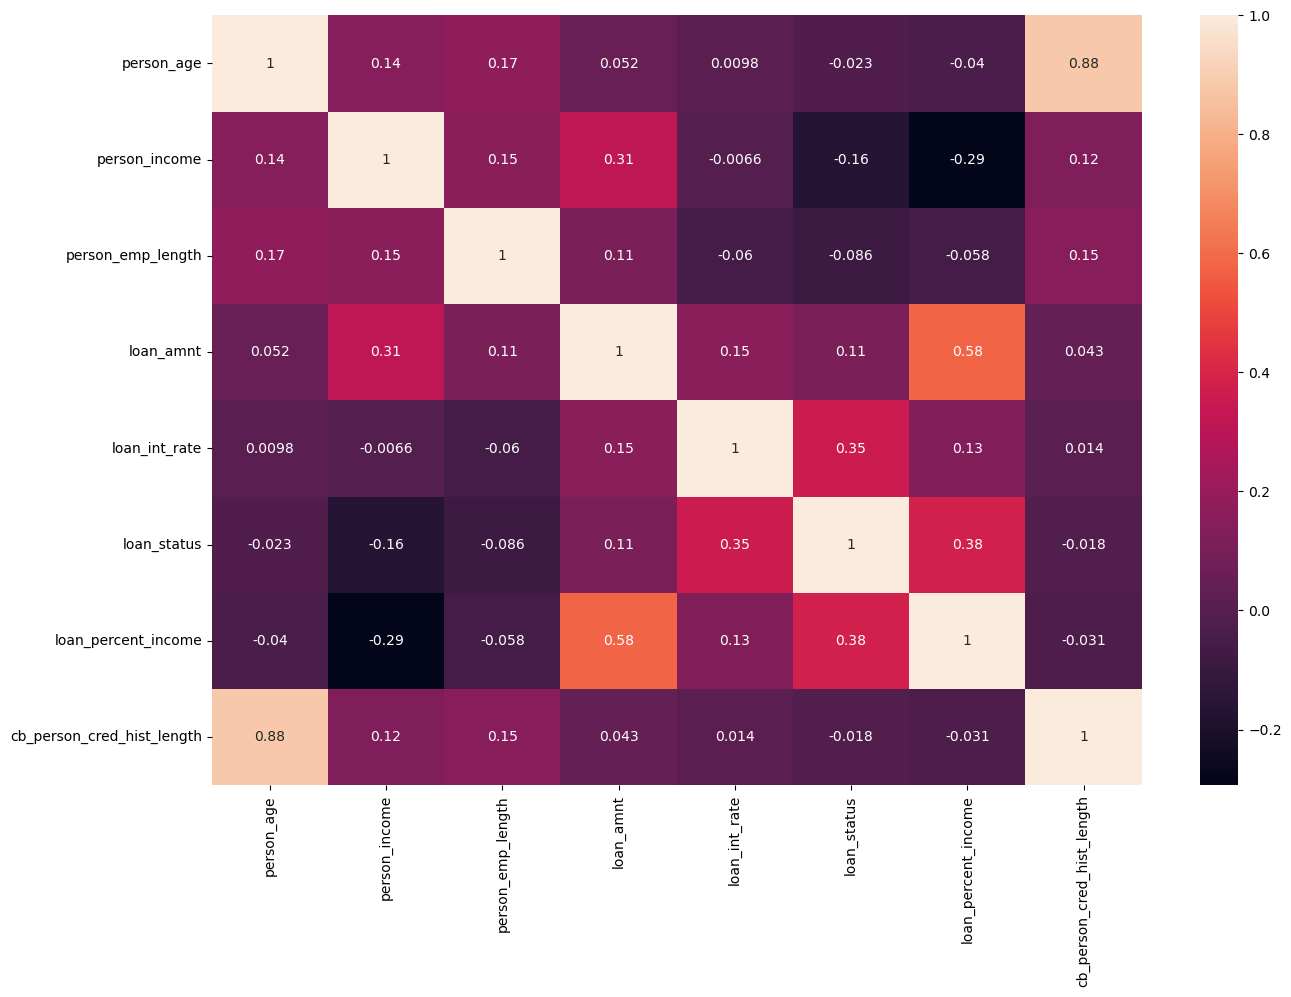

In [148]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)

Loan status has positive and strong correlation with the loan_int_rate and loan_percent_income. So we will check outkiers present 
in these columns or not. if they present then we will remove then using the box plot

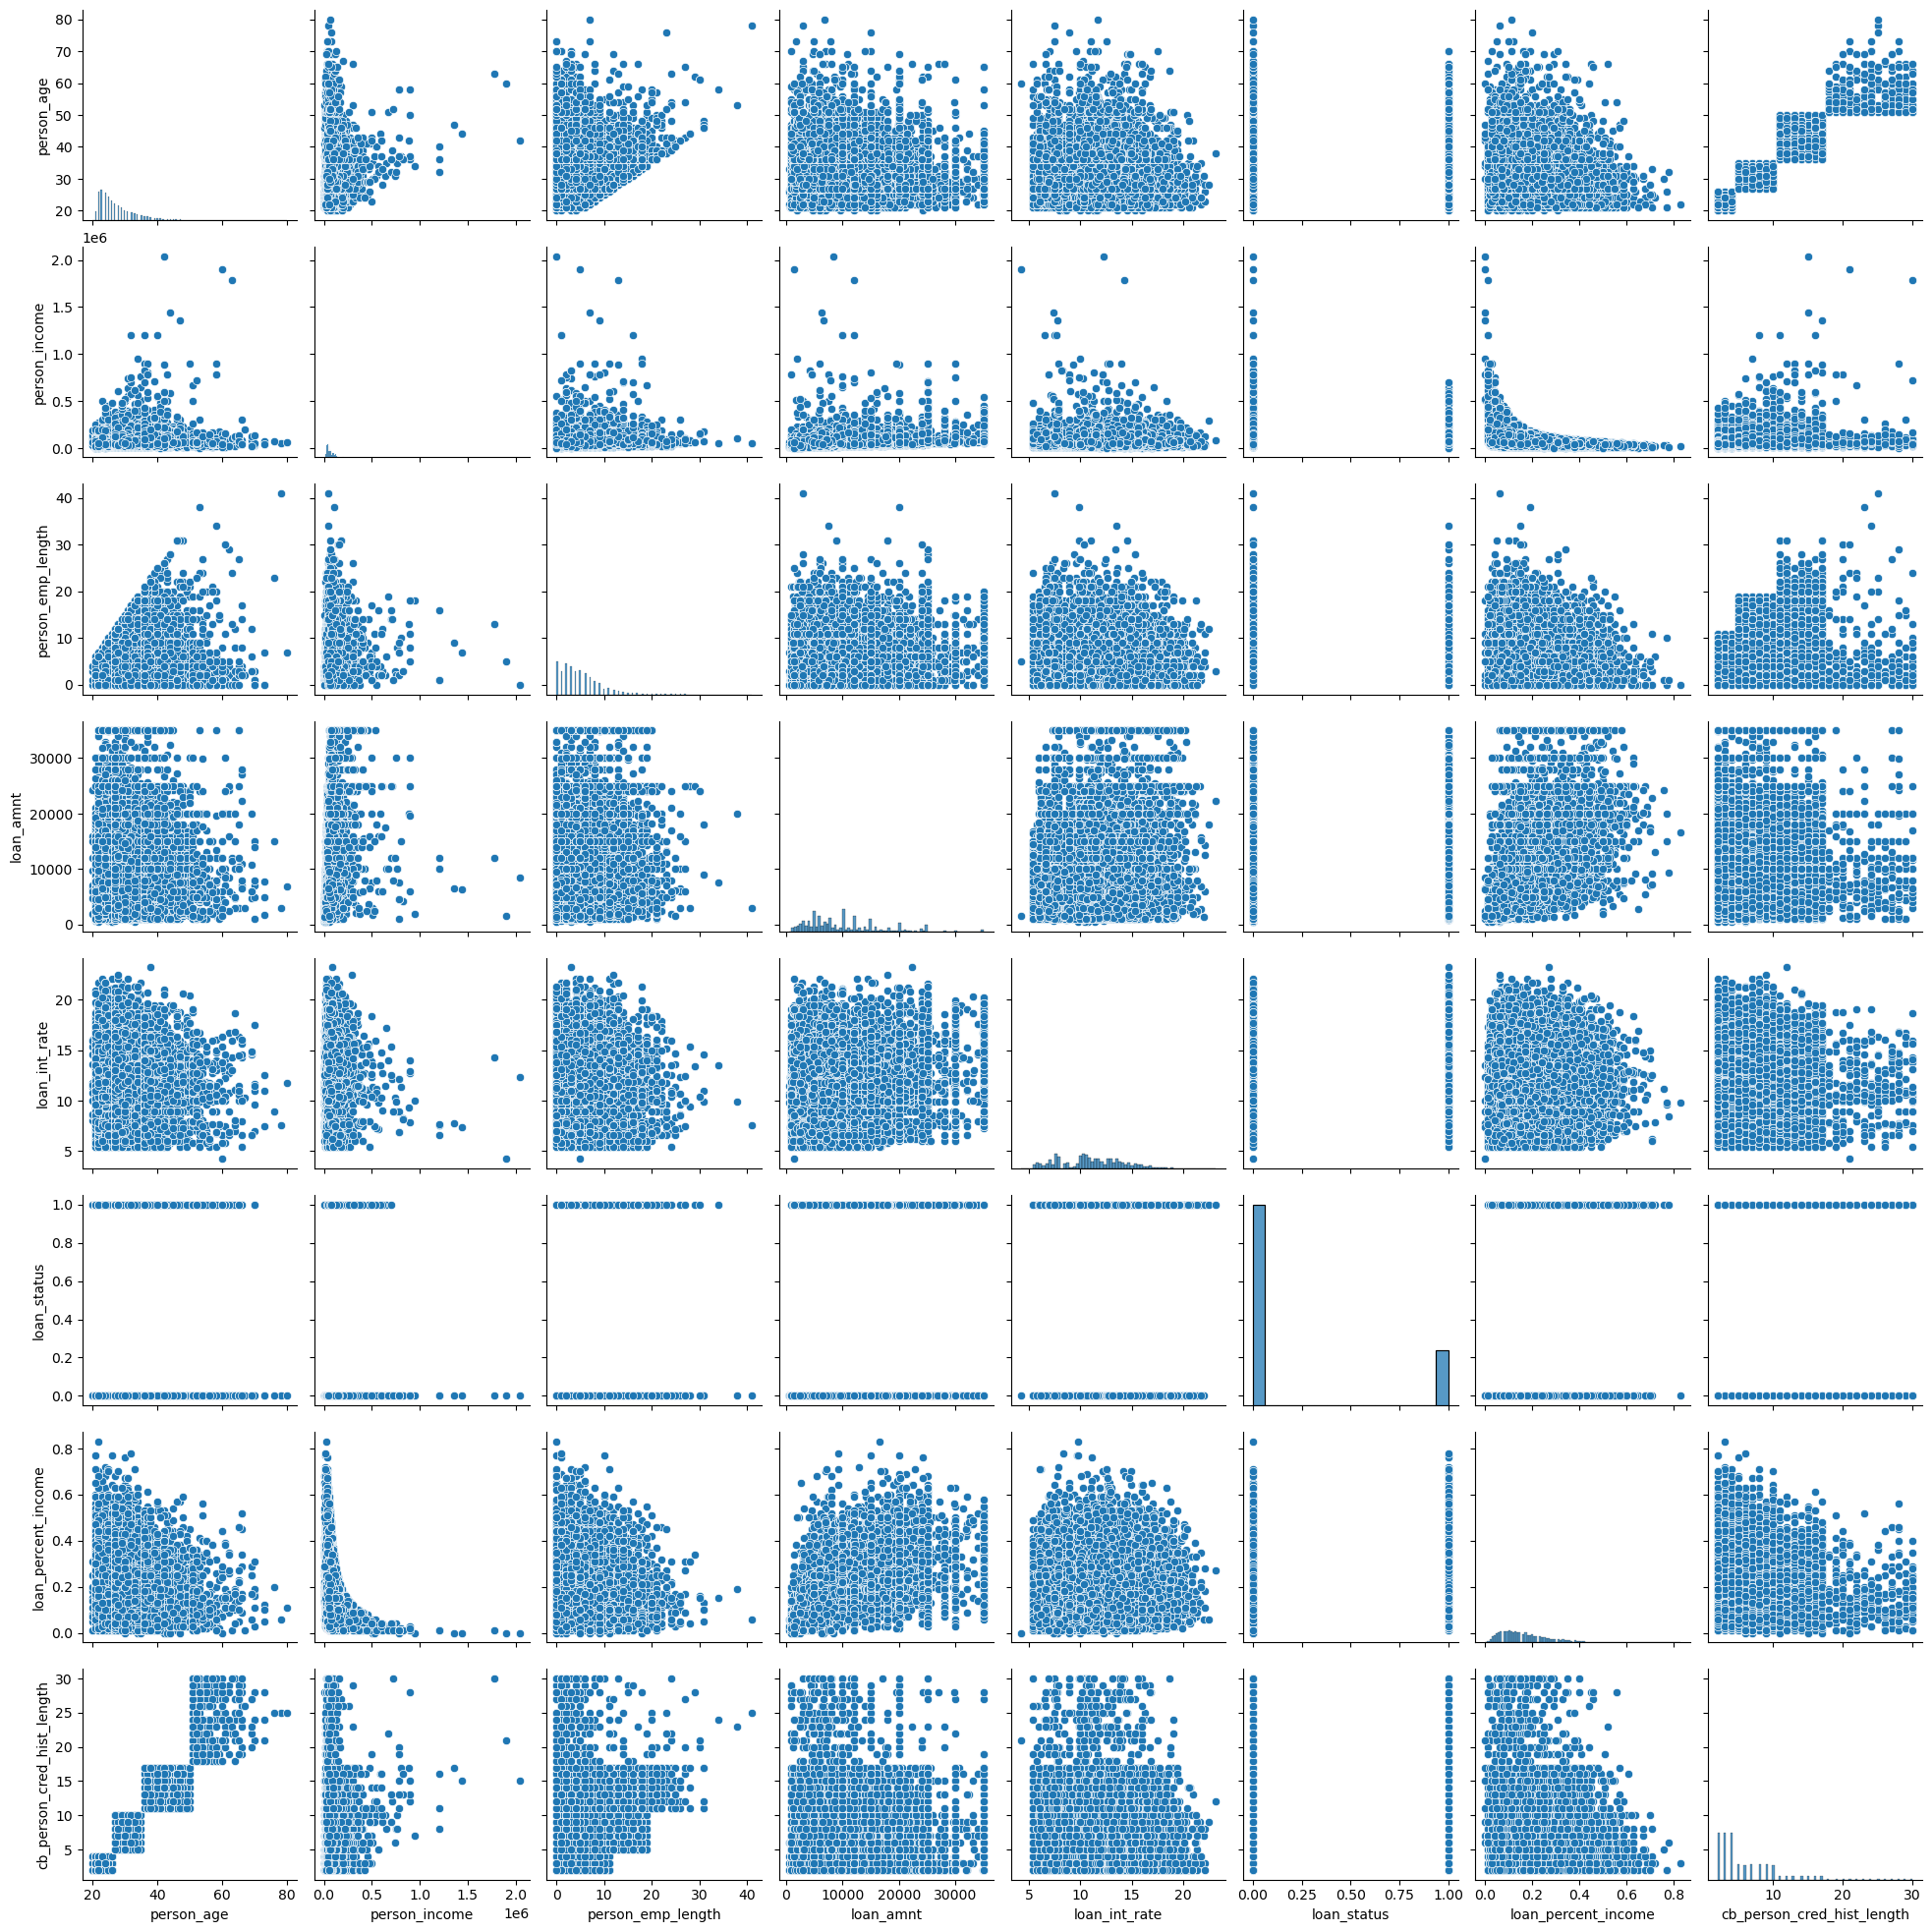

In [149]:
sns.pairplot(data=df)

### Outlier Removal

In [151]:
df.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0        21.0         9600.0                5.0     1000.0          11.14   
1        25.0         9600.0                1.0     5500.0          12.87   
2        23.0        65500.0                4.0    35000.0          15.23   
3        24.0        54400.0                8.0    35000.0          14.27   
4        21.0         9900.0                2.0     2500.0           7.14   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0          0.0                 0.10                         2.0   
1          1.0                 0.57                         3.0   
2          1.0                 0.53                         2.0   
3          1.0                 0.55                         4.0   
4          1.0                 0.25                         2.0   

  person_home_ownership loan_intent loan_grade cb_person_default_on_file  
0                   OWN   EDUCATION          B                         N  
1              MORTGAGE     MEDICAL          C                         N  
2                  RENT     MEDICAL          C                         N  
3                  RENT     MEDICAL          C                         Y  
4                   OWN     VENTURE          A                         N

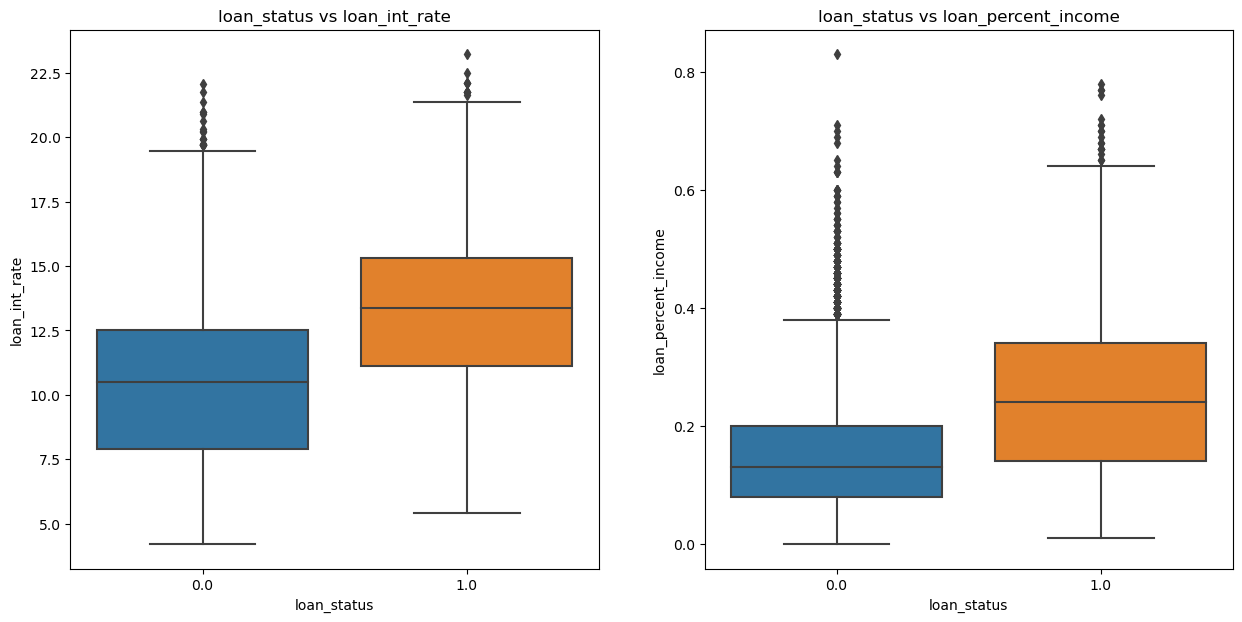

In [154]:
# Loan_int_rate and loan_percent_income
fig,ax = plt.subplots(1,2,figsize=(15,7))

sns.boxplot(data=df,x=df['loan_status'],y=df['loan_int_rate'],ax=ax[0])

sns.boxplot(data=df,x=df['loan_status'],y=df['loan_percent_income'],ax=ax[1])

ax[0].set_title("loan_status vs loan_int_rate")
ax[1].set_title("loan_status vs loan_percent_income")

plt.show()

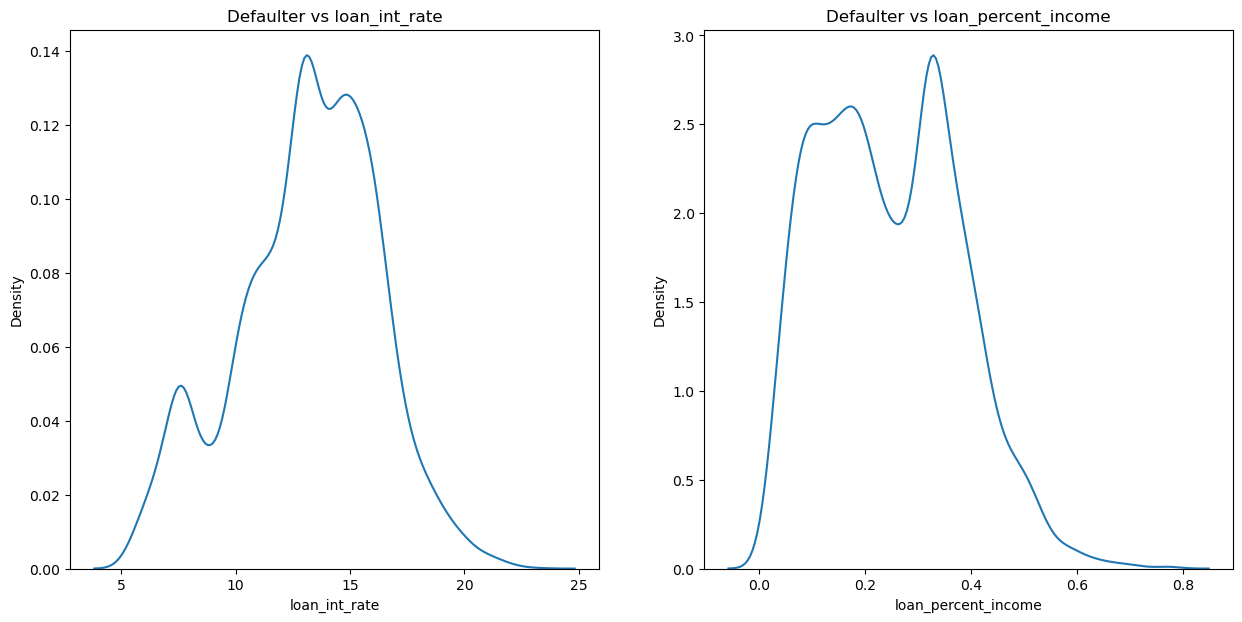

In [170]:
defaulter = df[df['loan_status']==1]

fig,ax = plt.subplots(1,2,figsize=(15,7))

sns.kdeplot(data=defaulter,x=defaulter['loan_int_rate'],ax=ax[0])

sns.kdeplot(data=defaulter,x=defaulter['loan_percent_income'],ax=ax[1])

ax[0].set_title("Defaulter vs loan_int_rate")
ax[1].set_title("Defaulter vs loan_percent_income")

plt.show()

In [241]:
# Outlier removal from loan_int_rate
defaulter = df[df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_int_rate'],25), np.percentile(defaulter['loan_int_rate'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(cutoff)

loan_int_rate_lower = q25-cutoff
loan_int_rate_upper = q75+cutoff

print(f"Lower Cutoff: {loan_int_rate_lower}, Upper Cutoff: {loan_int_rate_upper}")

outliers = [x for x in defaulter['loan_int_rate'] if x<loan_int_rate_lower or x>loan_int_rate_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

df = df.drop(df[((df['loan_int_rate']>loan_int_rate_upper) | (df['loan_int_rate']<loan_int_rate_lower))].index,axis=0)
df

6807
25th percentile: 11.11, 75th percentile: 15.31
Inter quartile range is: 4.200000000000001
6.300000000000002
Lower Cutoff: 4.809999999999998, Upper Cutoff: 21.610000000000003
Number of outliers: 10
outliers: [21.74, 22.11, 21.74, 22.11, 21.74, 21.74, 21.64, 22.11, 22.48, 23.22]


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            21.0         9600.0                5.0     1000.0          11.14   
1            25.0         9600.0                1.0     5500.0          12.87   
2            23.0        65500.0                4.0    35000.0          15.23   
3            24.0        54400.0                8.0    35000.0          14.27   
4            21.0         9900.0                2.0     2500.0           7.14   
...           ...            ...                ...        ...            ...   
31515        57.0        53000.0                1.0     5800.0          13.16   
31516        54.0       120000.0                4.0    17625.0           7.49   
31517        65.0        76000.0                3.0    35000.0          10.99   
31518        56.0       150000.0                5.0    15000.0          11.48   
31519        66.0        42000.0                2.0     6475.0           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0              0.0                 0.10                         2.0   
1              1.0                 0.57                         3.0   
2              1.0                 0.53                         2.0   
3              1.0                 0.55                         4.0   
4              1.0                 0.25                         2.0   
...            ...                  ...                         ...   
31515          0.0                 0.11                        30.0   
31516          0.0                 0.15                        19.0   
31517          1.0                 0.46                        28.0   
31518          0.0                 0.10                        26.0   
31519          0.0                 0.15                        30.0   

      person_home_ownership      loan_intent loan_grade  \
0                       OWN        EDUCATION          B   
1                  MORTGAGE          MEDICAL          C   
2                      RENT          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                       OWN          VENTURE          A   
...                     ...              ...        ...   
31515              MORTGAGE         PERSONAL          C   
31516              MORTGAGE         PERSONAL          A   
31517                  RENT  HOMEIMPROVEMENT          B   
31518              MORTGAGE         PERSONAL          B   
31519                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             N  
1                             N  
2                             N  
3                             Y  
4                             N  
...                         ...  
31515                         N  
31516                         N  
31517                         N  
31518                         N  
31519                         N  

[31507 rows x 12 columns]

In [242]:
# Outlier removal from loan_percent_income
defaulter = df[df['loan_status']==1]
print(len(defaulter))
q25, q75 = np.percentile(defaulter['loan_percent_income'],25), np.percentile(defaulter['loan_percent_income'],75)
print(f"25th percentile: {q25}, 75th percentile: {q75}")

iqr = (q75-q25)
cutoff = 1.5*iqr
print(f"Inter quartile range is: {iqr}")
print(cutoff)

loan_percent_income_lower = q25-cutoff
loan_percent_income_upper = q75+cutoff

print(f"Lower Cutoff: {loan_percent_income_lower}, Upper Cutoff: {loan_percent_income_upper}")

outliers = [x for x in defaulter['loan_percent_income'] if x<loan_percent_income_lower or x>loan_percent_income_upper]
print(f"Number of outliers: {len(outliers)}")
print(f"outliers: {outliers}")

df = df.drop(df[((df['loan_percent_income']>loan_percent_income_upper) | (df['loan_percent_income']<loan_percent_income_lower))].index,axis=0)
df

6797
25th percentile: 0.14, 75th percentile: 0.34
Inter quartile range is: 0.2
0.30000000000000004
Lower Cutoff: -0.16000000000000003, Upper Cutoff: 0.6400000000000001
Number of outliers: 19
outliers: [0.72, 0.69, 0.77, 0.77, 0.67, 0.65, 0.7, 0.71, 0.66, 0.68, 0.65, 0.68, 0.76, 0.67, 0.67, 0.7, 0.78, 0.71, 0.67]


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0            21.0         9600.0                5.0     1000.0          11.14   
1            25.0         9600.0                1.0     5500.0          12.87   
2            23.0        65500.0                4.0    35000.0          15.23   
3            24.0        54400.0                8.0    35000.0          14.27   
4            21.0         9900.0                2.0     2500.0           7.14   
...           ...            ...                ...        ...            ...   
31515        57.0        53000.0                1.0     5800.0          13.16   
31516        54.0       120000.0                4.0    17625.0           7.49   
31517        65.0        76000.0                3.0    35000.0          10.99   
31518        56.0       150000.0                5.0    15000.0          11.48   
31519        66.0        42000.0                2.0     6475.0           9.99   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0              0.0                 0.10                         2.0   
1              1.0                 0.57                         3.0   
2              1.0                 0.53                         2.0   
3              1.0                 0.55                         4.0   
4              1.0                 0.25                         2.0   
...            ...                  ...                         ...   
31515          0.0                 0.11                        30.0   
31516          0.0                 0.15                        19.0   
31517          1.0                 0.46                        28.0   
31518          0.0                 0.10                        26.0   
31519          0.0                 0.15                        30.0   

      person_home_ownership      loan_intent loan_grade  \
0                       OWN        EDUCATION          B   
1                  MORTGAGE          MEDICAL          C   
2                      RENT          MEDICAL          C   
3                      RENT          MEDICAL          C   
4                       OWN          VENTURE          A   
...                     ...              ...        ...   
31515              MORTGAGE         PERSONAL          C   
31516              MORTGAGE         PERSONAL          A   
31517                  RENT  HOMEIMPROVEMENT          B   
31518              MORTGAGE         PERSONAL          B   
31519                  RENT          MEDICAL          B   

      cb_person_default_on_file  
0                             N  
1                             N  
2                             N  
3                             Y  
4                             N  
...                         ...  
31515                         N  
31516                         N  
31517                         N  
31518                         N  
31519                         N  

[31482 rows x 12 columns]

In [243]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  31482.000000   3.148200e+04       31482.000000  31482.000000   
mean      27.739661   6.647344e+04           4.783877   9658.249952   
std        6.198633   5.172629e+04           4.037630   6331.991139   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.950400e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12493.750000   
max       80.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   31482.000000  31482.000000         31482.000000   
mean       11.037898      0.215298             0.169234   
std         3.086615      0.411035             0.105268   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.220000      0.000000             0.230000   
max        21.360000      1.000000             0.640000   

       cb_person_cred_hist_length  
count                31482.000000  
mean                     5.815577  
std                      4.061115  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

## Uni-Variate Analysis [Graphs]

### 1. Person Age

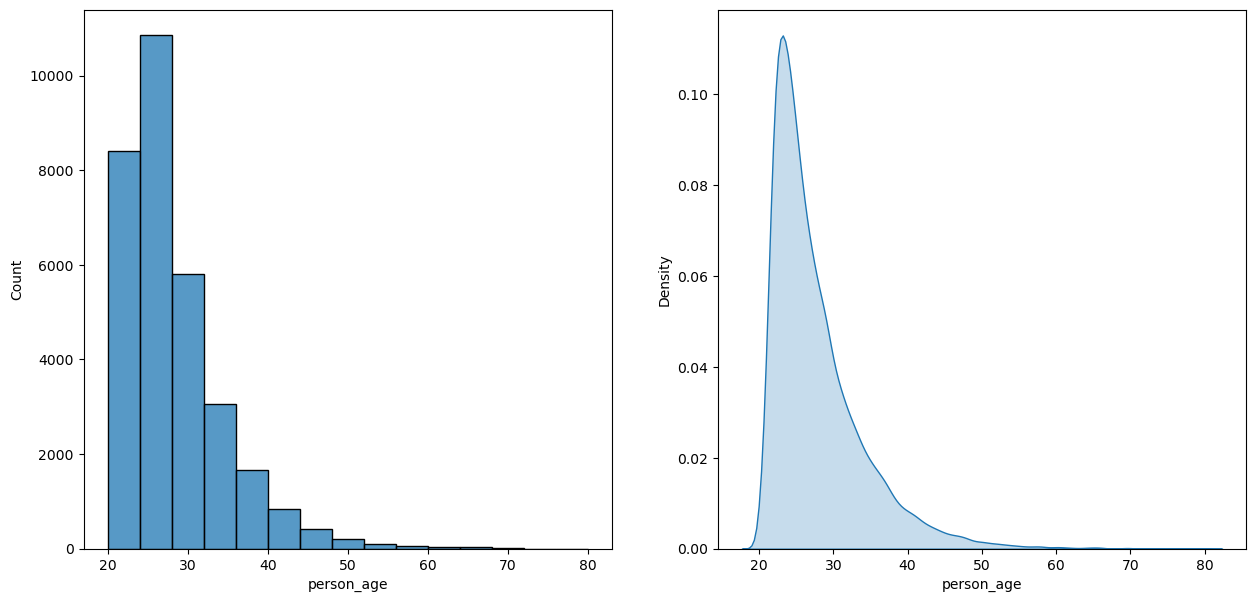

In [251]:
# Person_age Histogram
fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x=df['person_age'],ax=ax[0],bins=15)
sns.kdeplot(data=df,x=df['person_age'],ax=ax[1],fill=True)
plt.show()

Observation:-
1. Age of loaner are mainly in between 20-35 years

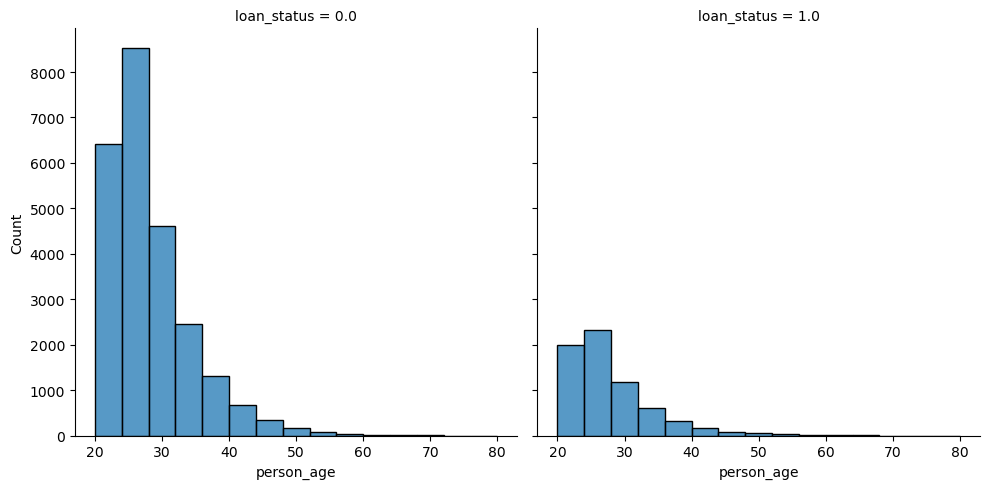

In [255]:

sns.displot(data=df,x=df['person_age'],kind="hist",bins=15,col=df['loan_status'])

plt.show()

Observation:-
1. Pattern of loan defaulters and non defaulters are same

### 2. Person Income

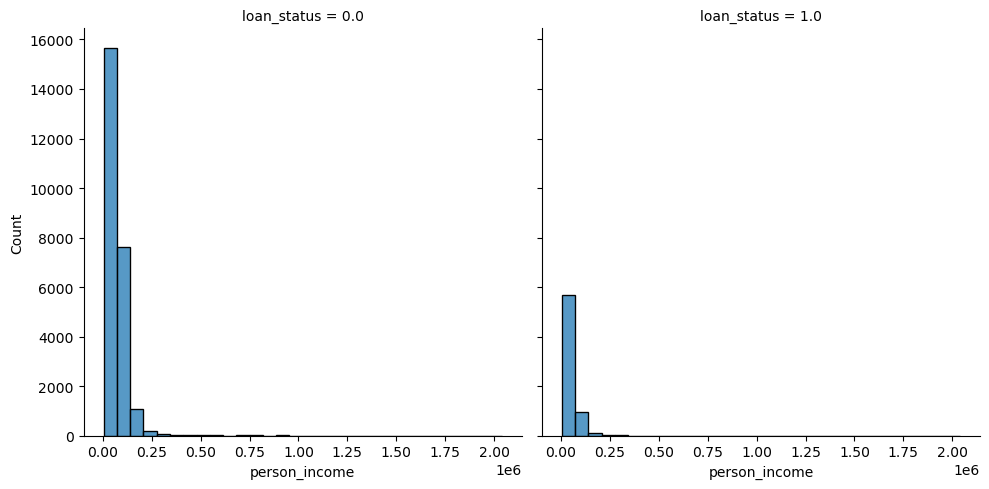

In [267]:
# Person_income Histogram
sns.displot(data=df,x=df['person_income'],kind="hist",bins=30,col=df['loan_status'])
plt.show()

Observation:-

1. Low person income default more

### 3. Person House Ownership

In [268]:
df.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0        21.0         9600.0                5.0     1000.0          11.14   
1        25.0         9600.0                1.0     5500.0          12.87   
2        23.0        65500.0                4.0    35000.0          15.23   
3        24.0        54400.0                8.0    35000.0          14.27   
4        21.0         9900.0                2.0     2500.0           7.14   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0          0.0                 0.10                         2.0   
1          1.0                 0.57                         3.0   
2          1.0                 0.53                         2.0   
3          1.0                 0.55                         4.0   
4          1.0                 0.25                         2.0   

  person_home_ownership loan_intent loan_grade cb_person_default_on_file  
0                   OWN   EDUCATION          B                         N  
1              MORTGAGE     MEDICAL          C                         N  
2                  RENT     MEDICAL          C                         N  
3                  RENT     MEDICAL          C                         Y  
4                   OWN     VENTURE          A                         N

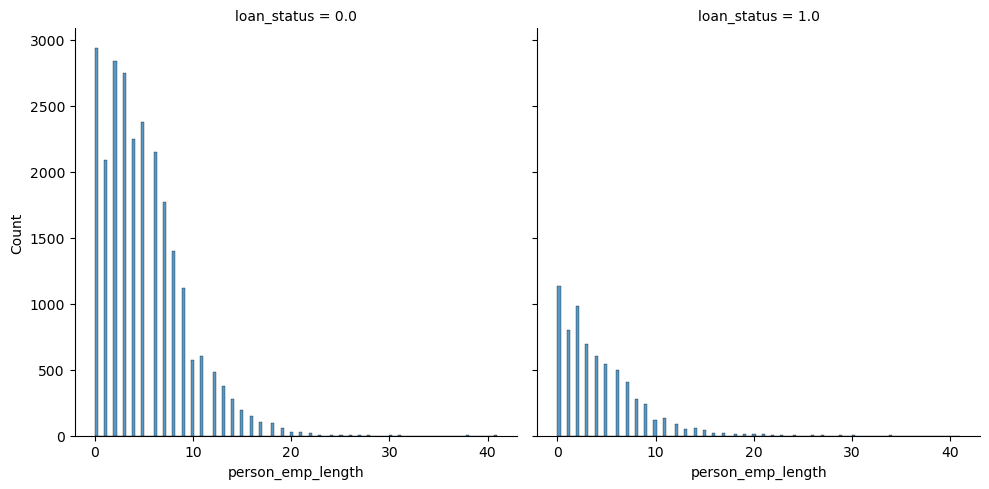

In [274]:
# person_emp_length Histogram
sns.displot(data=df,x=df['person_emp_length'],kind="hist",col=df['loan_status'])
plt.show()

Observations:-

1. The person doing job from more than 10 year is able to repay loan means default less
2. Less employment length means significant defaulter

In [277]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'cb_person_default_on_file'],
      dtype='object')

### 4. Person loan amount

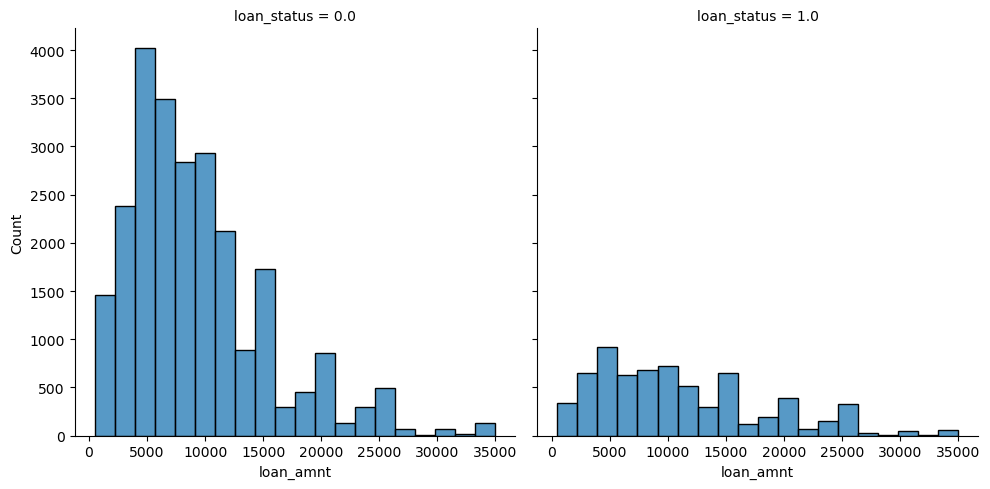

In [330]:
# loan_amnt Histogram
sns.displot(data=df,x=df['loan_amnt'],kind="hist",bins=20,col=df['loan_status'])
plt.show()

### 5. Loan interest rate

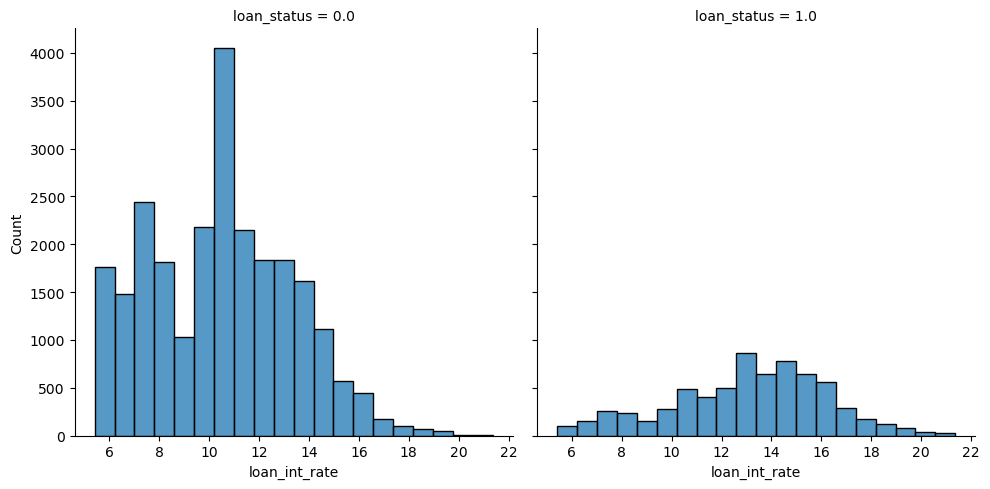

In [331]:
# loan_int_rate Histogram
sns.displot(data=df,x=df['loan_int_rate'],kind="hist",bins=20,col=df['loan_status'])
plt.show()

Observations:-

1. Higher interest rate is become the reason of default on loan
2. Person who has taking the loan on the higher interest is chance to beacome a loan defaulter

### 6. Loan Status

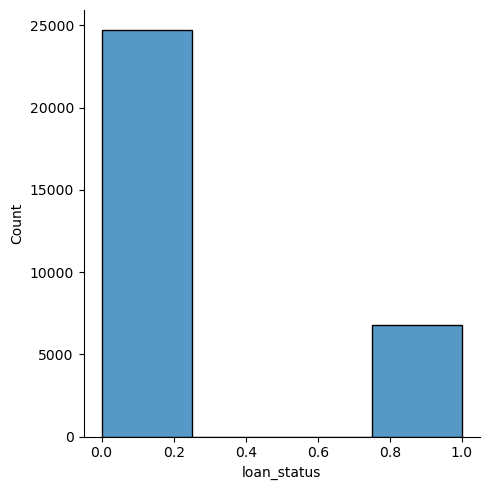

In [336]:
# loan_status Histogram
sns.displot(data=df,x=df['loan_status'],kind="hist",bins=4)
plt.show()

Observations:-

1. The above observation is showing the data imbalancy
2. Normal Case = 25000 (approx)
3. Defaul Case = 6000 (approx)

### 7. Loan percent income

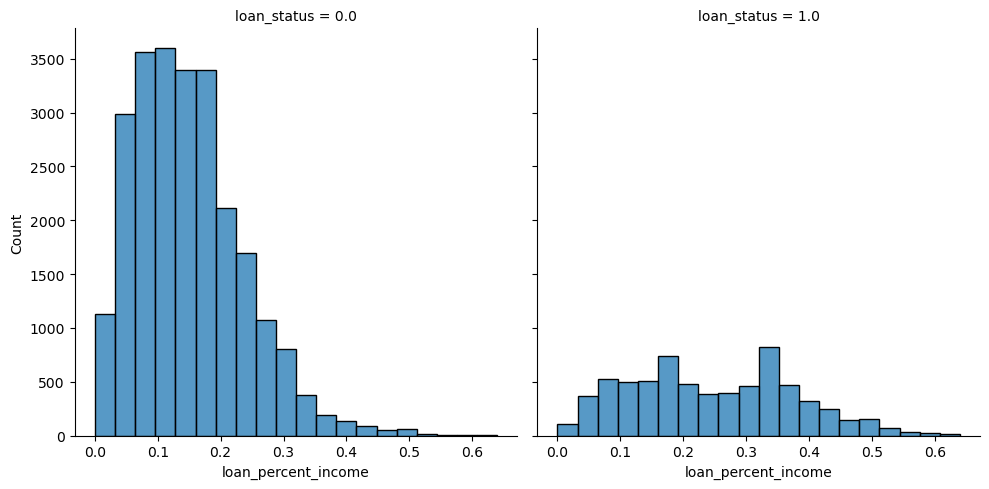

In [337]:
# loan_percent_income Histogram
sns.displot(data=df,x=df['loan_percent_income'],kind="hist",bins=20,col=df['loan_status'])
plt.show()

### 8. Person credit history length

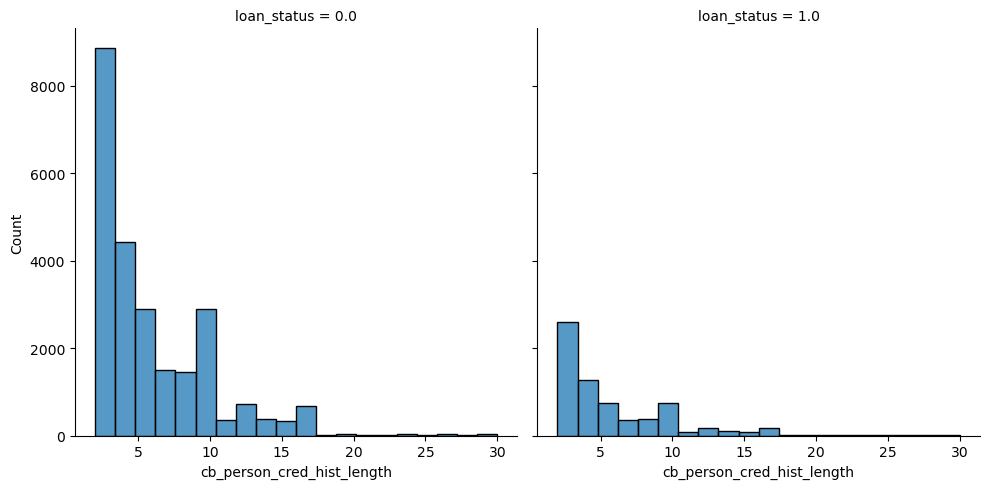

In [338]:
# cb_person_cred_hist_length Histogram
sns.displot(data=df,x=df['cb_person_cred_hist_length'],kind="hist",bins=20,col=df['loan_status'])
plt.show()

In [339]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'cb_person_default_on_file'],
      dtype='object')

### 9. Person home ownership

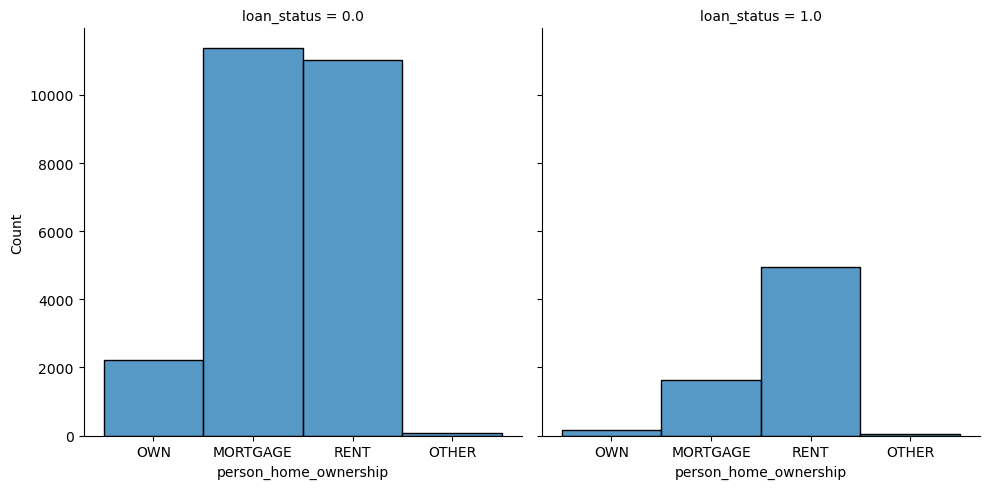

In [273]:
# Person_home_ownership Histogram
sns.displot(data=df,x=df['person_home_ownership'],kind="hist",col=df['loan_status'])
plt.show()

Observation:-

1. Rented house owner defalut more than own house owner
2. Mortgage house owner also default more comapare to own house ownner

### 10. Person loan intension

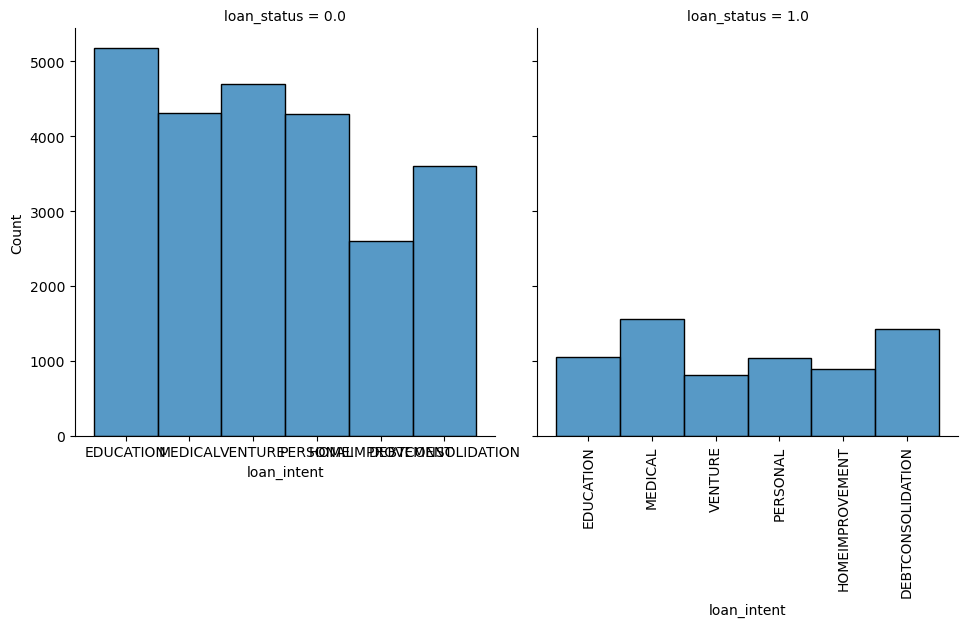

In [276]:
# loan_intent Histogram
sns.displot(data=df,x=df['loan_intent'],kind="hist",col=df['loan_status'])
plt.xticks(rotation="vertical")
plt.show()

Observations:-

1. Medical and debtconsolidation loaner defualt more

### 11. Loan grade of person

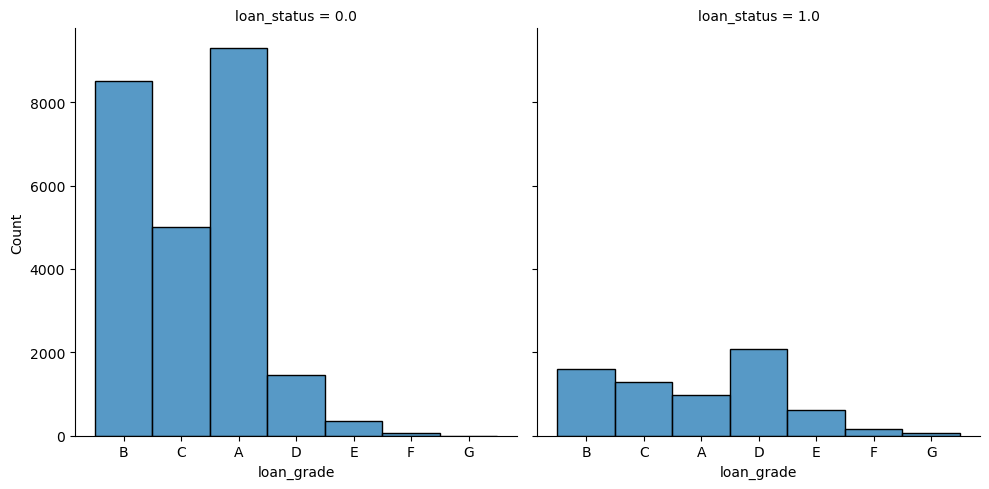

In [340]:
# loan_grade Histogram
sns.displot(data=df,x=df['loan_grade'],kind="hist",col=df['loan_status'])
plt.show()

Observations:-

1. Loan grade D and E default more.

### 12. Person credit history

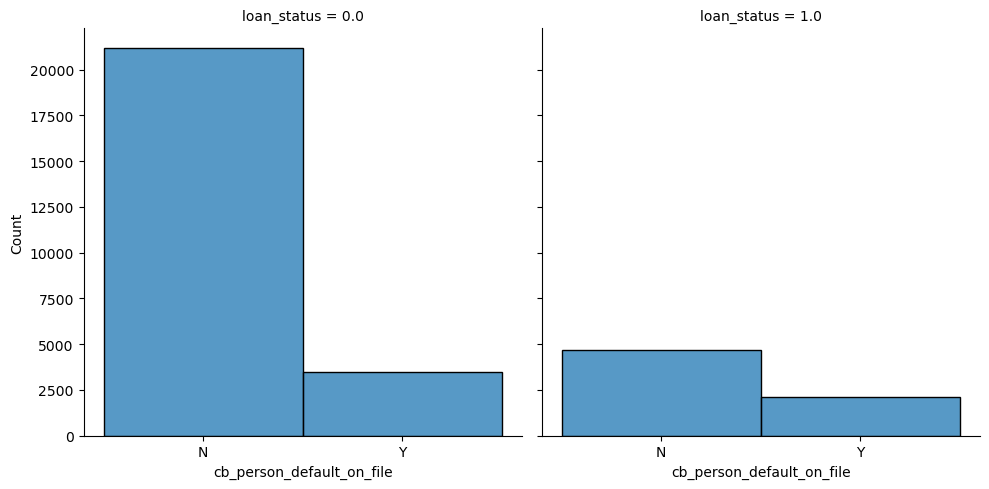

In [342]:
# cb_person_default_on_file Histogram
sns.displot(data=df,x=df['cb_person_default_on_file'],kind="hist",col=df['loan_status'])
plt.show()

Observations:-

1. The ratio of loaner default is higher given that his name present in the default file 

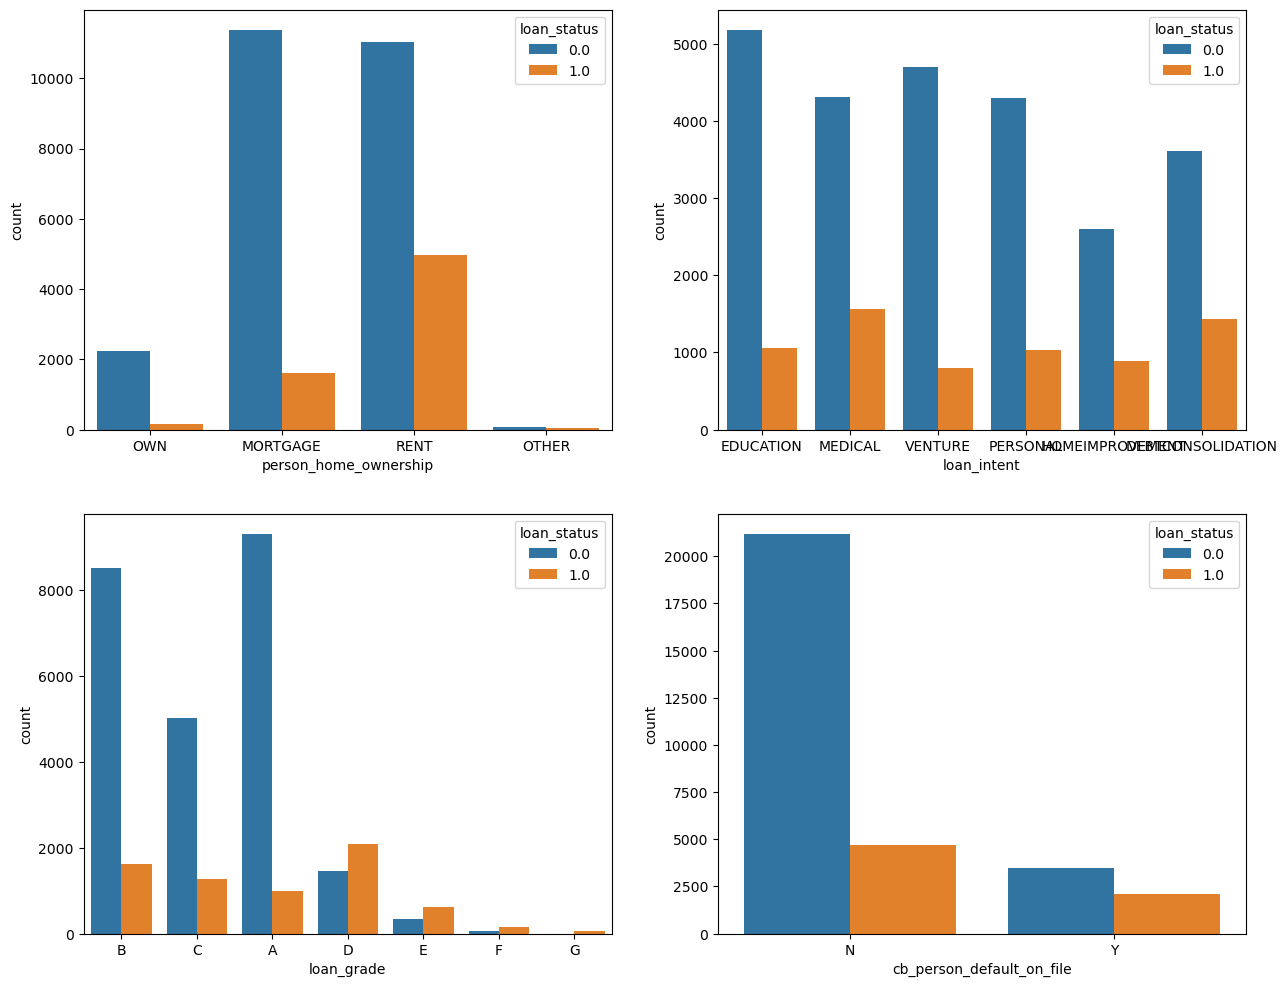

In [358]:
fig,ax = plt.subplots(2,2,figsize=(15,12))
sns.countplot(data=df,x=df['person_home_ownership'],hue=df['loan_status'],ax=ax[0,0])
sns.countplot(data=df,x=df['loan_intent'],hue=df['loan_status'],ax=ax[0,1])
sns.countplot(data=df,x=df['loan_grade'],hue=df['loan_status'],ax=ax[1,0])
sns.countplot(data=df,x=df['cb_person_default_on_file'],hue=df['loan_status'],ax=ax[1,1])

plt.show()

## Bi-Variate Analysis

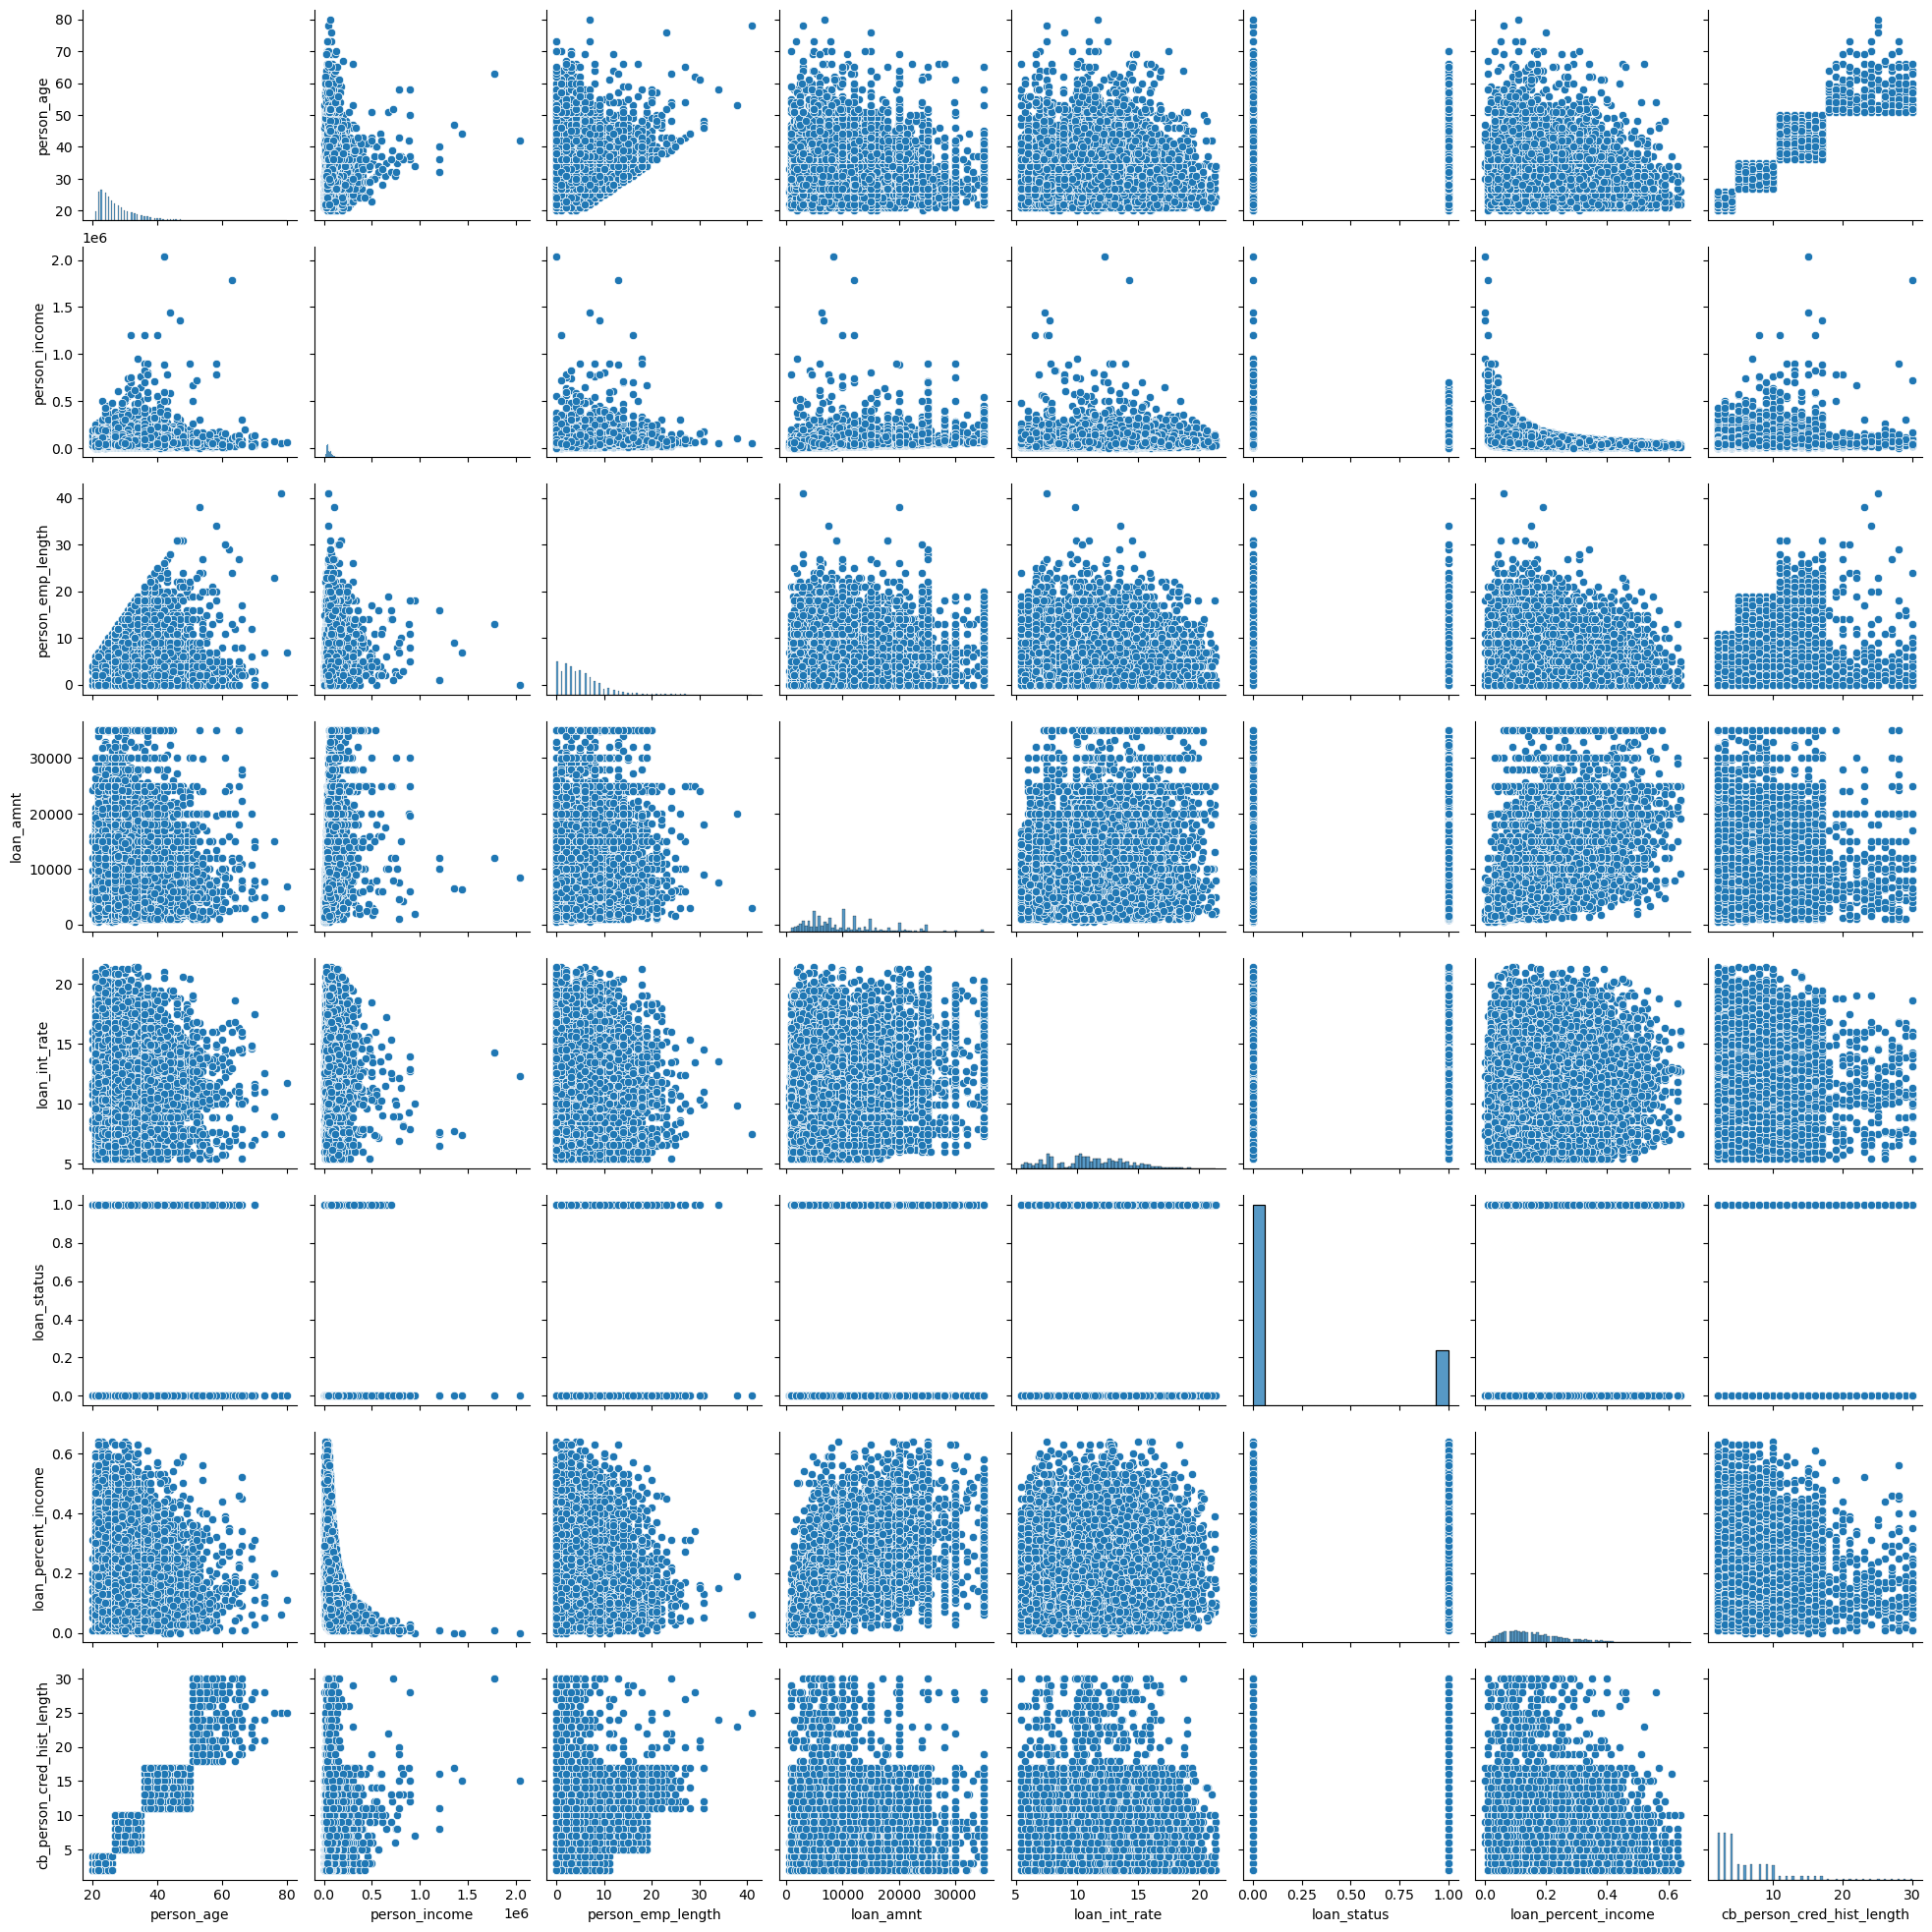

In [372]:
sns.pairplot(df)

In [360]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'cb_person_default_on_file'],
      dtype='object')

### person_age vs person_income

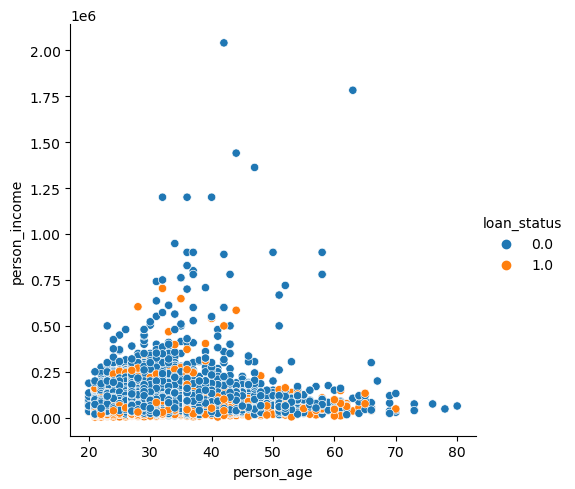

In [373]:
sns.relplot(data=df,x=df['person_age'],y=df['person_income'],kind='scatter',hue=df['loan_status'])
plt.show()

Observations:-

1. Less person income means more defaulter

### person_age vs person_emp_length

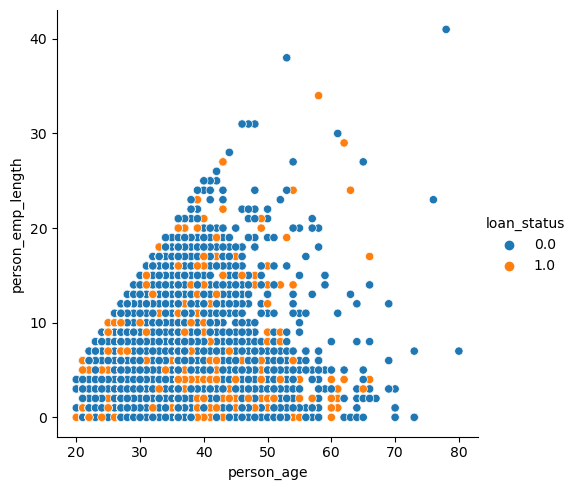

In [377]:
sns.relplot(data=df,x=df['person_age'],y=df['person_emp_length'],kind='scatter',hue=df['loan_status'])
plt.show()

Observations:-

1. As person age is increasing then person employment length is also increasing
2. Near 40, 60 age and employment length less than 10 years have more defaulters 

### person_age vs loan_int_rate

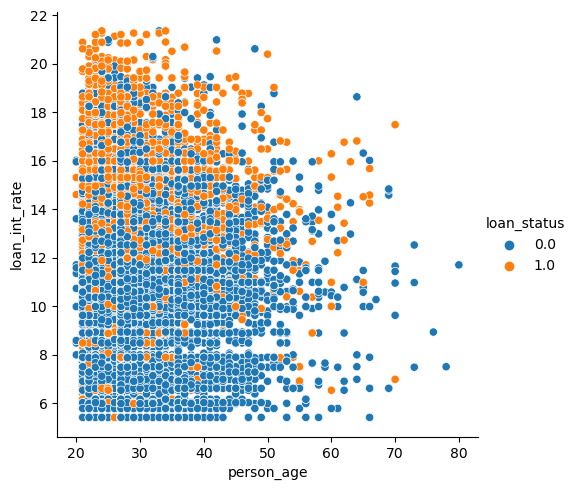

In [379]:
sns.relplot(data=df,x=df['person_age'],y=df['loan_int_rate'],kind='scatter',hue=df['loan_status'])
plt.show()

Observations:-

1. if the inetrest rate is then chance of defulting is also high

### loan_amnt vs loan_int_rate

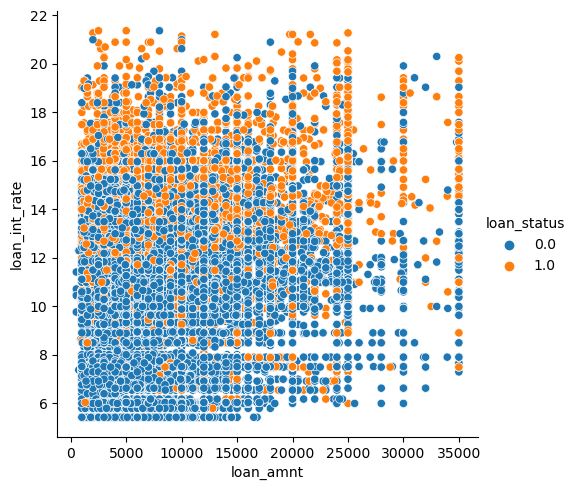

In [392]:
sns.relplot(data=df,x=df['loan_amnt'],y=df['loan_int_rate'],kind='scatter',hue=df['loan_status'])
plt.show()

In [398]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'cb_person_default_on_file'],
      dtype='object')

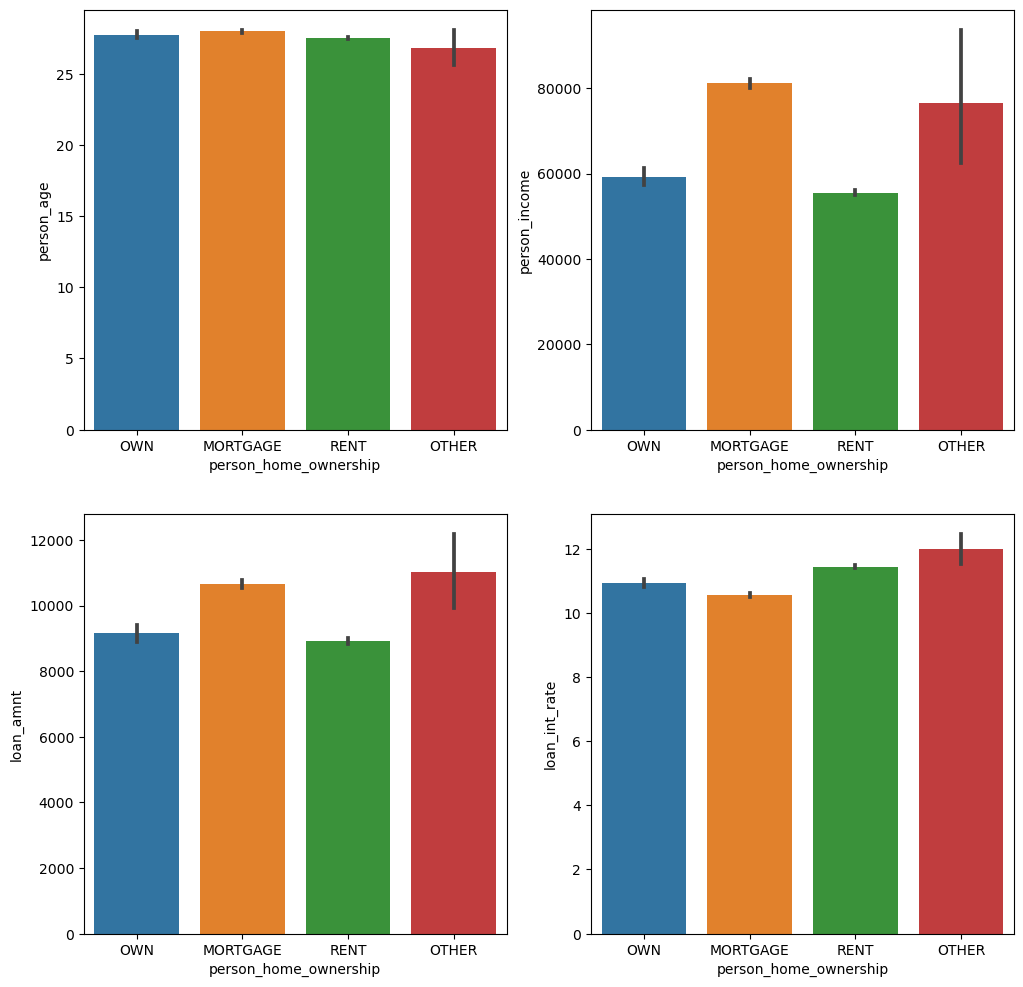

In [412]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
sns.barplot(data=df,x=df['person_home_ownership'],y=df['person_age'],ax=ax[0,0])
sns.barplot(data=df,x=df['person_home_ownership'],y=df['person_income'],ax=ax[0,1])
sns.barplot(data=df,x=df['person_home_ownership'],y=df['loan_amnt'],ax=ax[1,0])
sns.barplot(data=df,x=df['person_home_ownership'],y=df['loan_int_rate'],ax=ax[1,1])


plt.show()

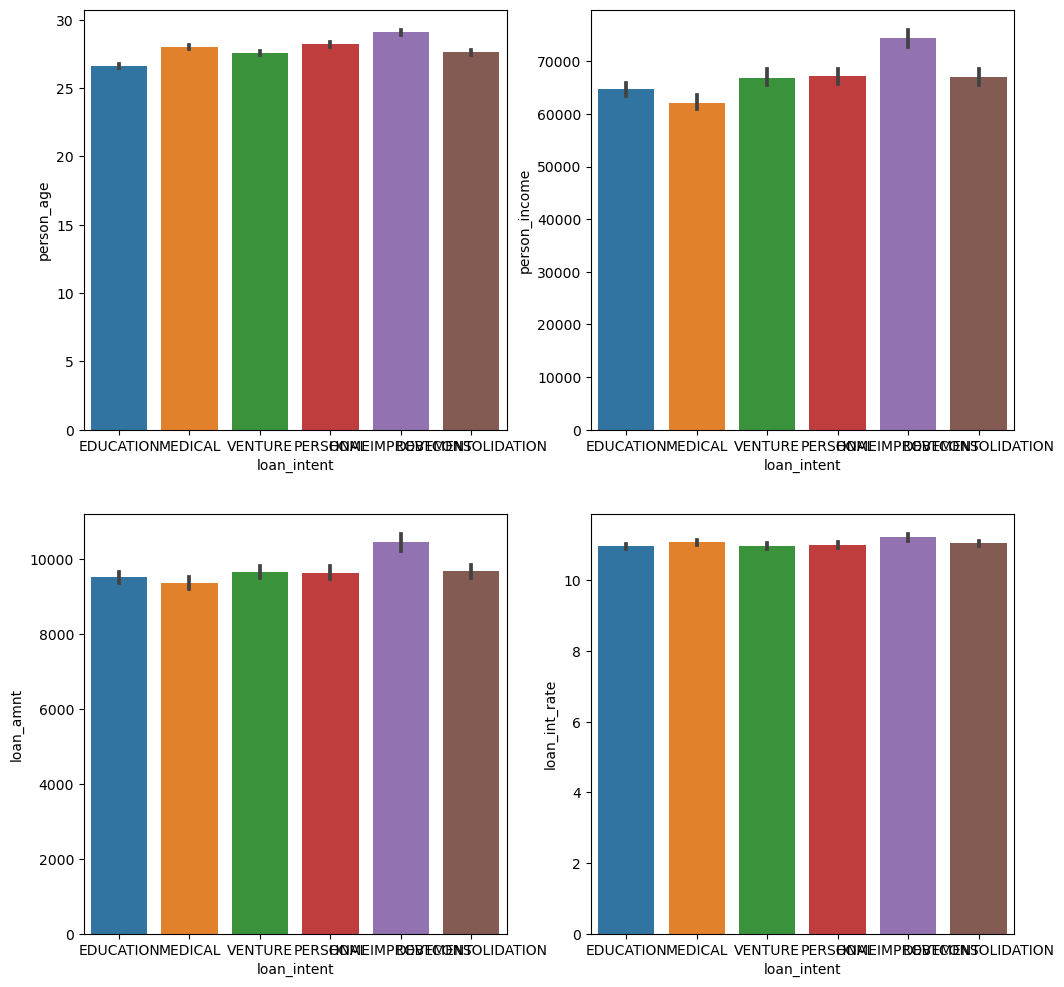

In [413]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
sns.barplot(data=df,x=df['loan_intent'],y=df['person_age'],ax=ax[0,0])
sns.barplot(data=df,x=df['loan_intent'],y=df['person_income'],ax=ax[0,1])
sns.barplot(data=df,x=df['loan_intent'],y=df['loan_amnt'],ax=ax[1,0])
sns.barplot(data=df,x=df['loan_intent'],y=df['loan_int_rate'],ax=ax[1,1])


plt.show()

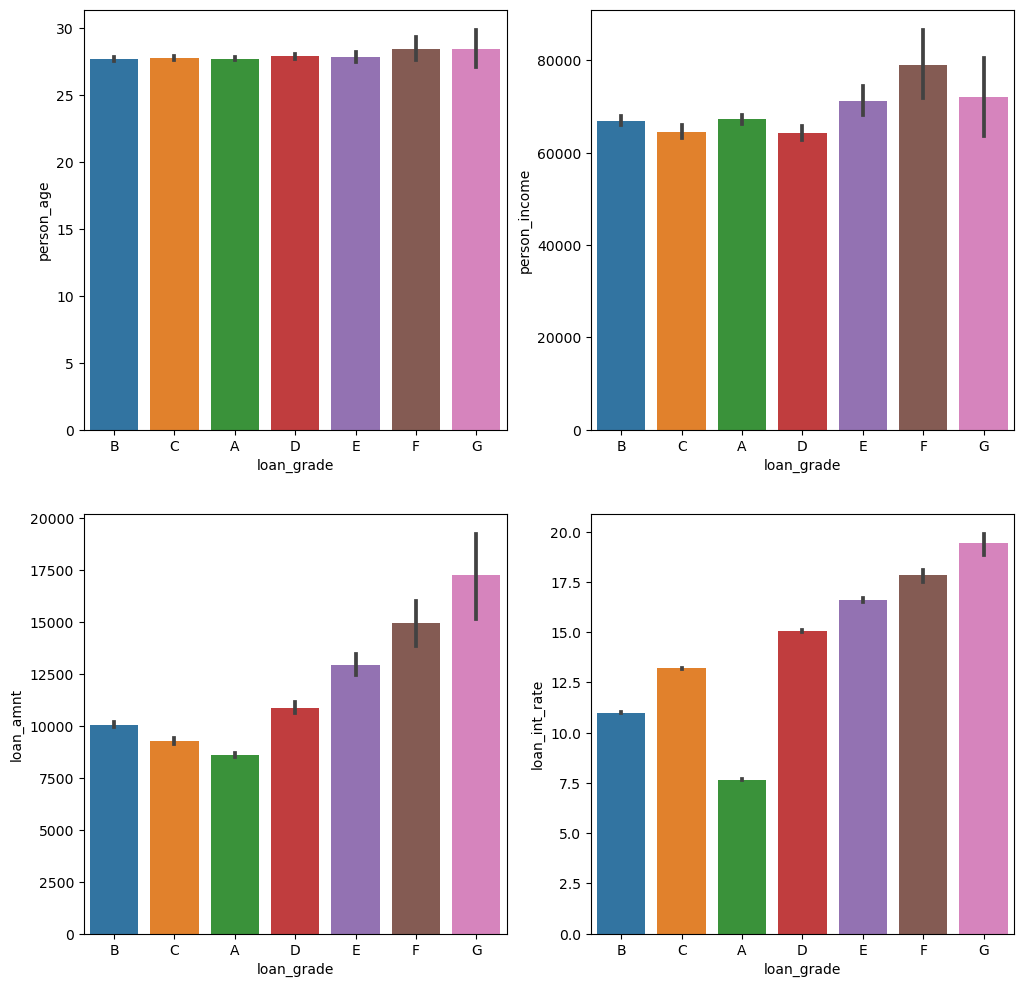

In [414]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
sns.barplot(data=df,x=df['loan_grade'],y=df['person_age'],ax=ax[0,0])
sns.barplot(data=df,x=df['loan_grade'],y=df['person_income'],ax=ax[0,1])
sns.barplot(data=df,x=df['loan_grade'],y=df['loan_amnt'],ax=ax[1,0])
sns.barplot(data=df,x=df['loan_grade'],y=df['loan_int_rate'],ax=ax[1,1])


plt.show()

In [415]:
df.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'cb_person_default_on_file'],
      dtype='object')

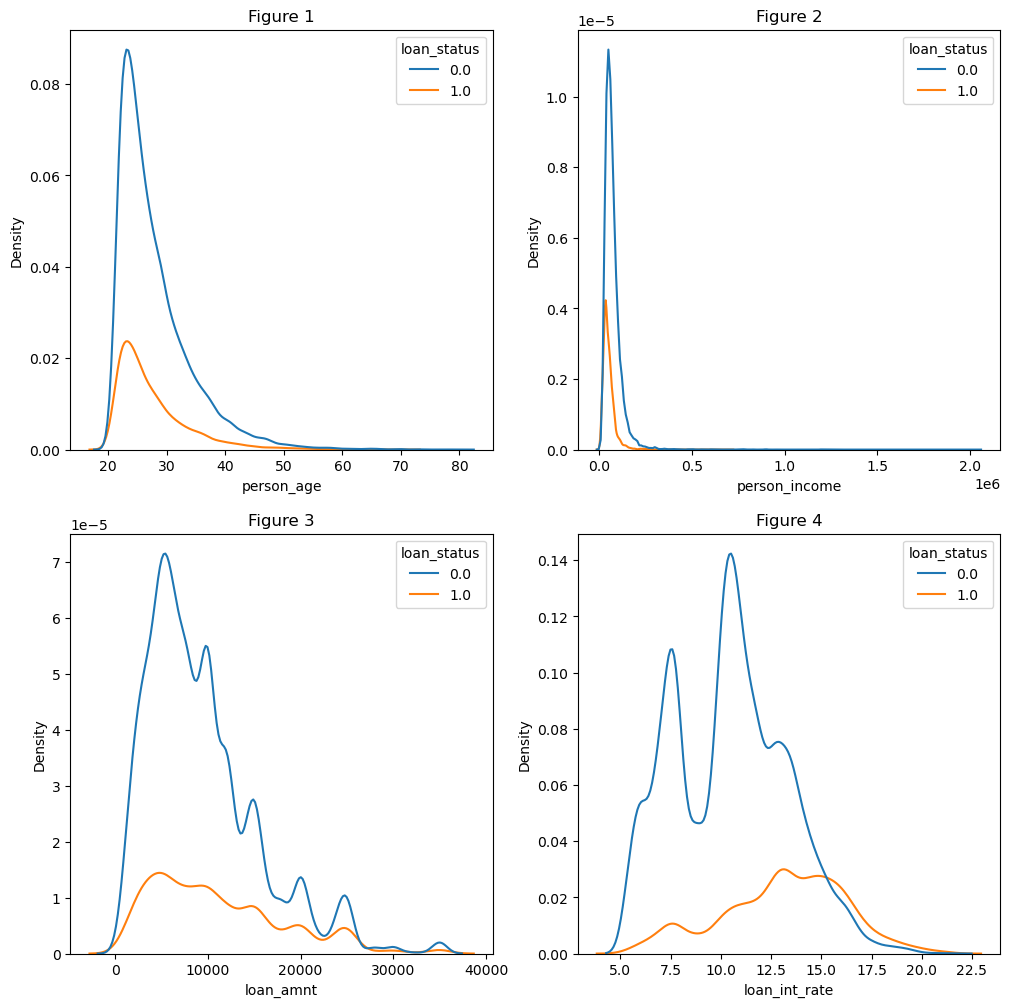

In [426]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
sns.kdeplot(data=df,x=df['person_age'],hue=df['loan_status'],ax=ax[0,0])
ax[0,0].set_title("Figure 1")
sns.kdeplot(data=df,x=df['person_income'],hue=df['loan_status'],ax=ax[0,1])
ax[0,1].set_title("Figure 2")
sns.kdeplot(data=df,x=df['loan_amnt'],hue=df['loan_status'],ax=ax[1,0])
ax[1,0].set_title("Figure 3")
sns.kdeplot(data=df,x=df['loan_int_rate'],hue=df['loan_status'],ax=ax[1,1])
ax[1,1].set_title("Figure 4")
plt.show()

Observations:-

1. Figure(4) - There is a high chance that if loan interest rate is greater than 15% so it will be defaulter 

## Conclusion:-

Observation:-
1. Age of loaner are mainly in between 20-35 years
2. Pattern of loan defaulters and non defaulters are same
3. Low person income have more defaulter
4. The person doing job from more than 10 year is able to repay loan means default less
5. Less employment length means significant defaulter(emp_length < 10 years)
6. Higher interest rate is become the reason of default on loan(inerest rate > 15%)
7. Person who has taking the loan on the higher interest is chance to default is more
8. Imbalanced dataset
   - Normal Case = 25000 (approx)
   - Defaulter Case = 6000 (approx)
9. Rented house owner defalut more than owned house owner
10. Mortgage house owner also default more comapare to own house ownner
11. Loan taken for the reason of mediacal and debtconsolidation is chance to defualt high
12. Loan grade A has good creditworthiness and chance to repay thier loan is high
13. Loan grade D and E have bad creditworthiness and chance to repay their loan is low
14. The ratio of loaner default is higher given that his name present in the default file
15. As person age is increasing then person employment length is also increasing
16. At 40, 60 age and employment length less than 10 years have more defaulters 